In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma
from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from soynlp.normalizer import *
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 600)

In [2]:
df = pd.read_csv('./result/2021-04-16_구글 마켓컬리.csv')
df1 = pd.read_csv('./result/2021-04-16_마켓컬리.csv')

In [3]:
df.sort_values('date')

,name,ratings,date,helpful,comment,developer_comment
7394,강욱,5,2016-03-01,0,Good,NaN
7393,Jungyoon Choi,5,2016-03-01,1,더이상 밤늦게 슈퍼를 헤매고 다니지않아도됨,NaN
7391,김김,5,2016-03-02,7,"아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고,포장배송완벽함!내눈...",NaN
7374,반포한의원edy,1,2016-03-02,3,"모바일페이지도 그다지 편하지는않았는데, 이건 훨씬더 불편ㅜㅜ 인내심으로 결제까지 기...",NaN
7375,유재연,4,2016-03-02,17,고기랑 과일 몇 번 사먹었는데 괜찮더라구요~이제 앱까지 출시되었으니 자주 이용할 것...,NaN
...,...,...,...,...,...,...
4,박민,5,2021-04-16,0,물품다양 고퀄리티 원료굿 배송굿 서비스굿,NaN
3,이미옥,5,2021-04-16,0,빠른배송감사합니다,NaN
2,김한울,1,2021-04-16,0,가격대별로 볼수있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더있...,NaN
1,정용우,5,2021-04-16,0,깔끔한 앱,NaN


In [4]:
df1.sort_values('date')

,name,ratings,date,title,comment
2640,NaN,5,2016-02-20,완전사랑하는마켓컬리,마침내앱이나왔네요
2602,NaN,5,2016-03-02,드디어 앱으로!!!,반가운 앱출시 소식에 바로 다운 받았어요! 신속한 배송과 질높은 식재료에 값 또한 ...
2521,NaN,5,2016-03-02,마켓컬리 진짜 사랑해요~^^,알게 된 지 얼마 되지 않았지만 정말로 만족스럽게 쇼핑 하고 있습니다. 품질도 배송...
2520,NaN,5,2016-03-02,기다리던 마켓컬리 어플!!,진짜루 나올지몰랐는데 나왔네요 마켓컬리 어플!! 출퇴근길에 핸드폰으로 장보는 편인데...
2590,NaN,5,2016-03-02,앱 출시 축하,성장하고 편리해지는 서비스에 늘 감동입니다 주변 지인에게 엄청 소문내고있어요 번창하세요~
...,...,...,...,...,...
645,NaN,5,2021-04-14,신선. 정확. 친절,소비자 응대 만점. 재료및 맛도 완벽해요. 다만 다양하지 않아 좀 불편해요
1893,NaN,5,2021-04-14,배송이 빨라 좋네요.,배송도 빠르고 좋아요.
1312,NaN,5,2021-04-14,좋습니다,간편하게 장 볼 수 있어서 좋아요
358,NaN,4,2021-04-14,만족요~~,익일 새벽 배송되고 좋아요!!


In [15]:
round(df.describe(),2)

,ratings
count,7395.00
mean,4.37
std,1.23
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [14]:
round(df1.describe(),2)

,ratings
count,2995.00
mean,4.32
std,1.25
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [6]:
df = df[['date', 'comment', 'ratings']]
df1 = df1[['date', 'comment', 'ratings']]

In [7]:
df['date']= pd.to_datetime(df['date']) 
# df['Year'] = df['date'].dt.year 
# df['Month'] = df['date'].dt.month 
df1['date']= pd.to_datetime(df1['date']) 
# df1['Year'] = df1['date'].dt.year 
# df1['Month'] = df1['date'].dt.month 

In [8]:
df['Year-Month'] = df['date'].dt.strftime('%Y-%m')
df1['Year-Month'] = df1['date'].dt.strftime('%Y-%m')

df1

,date,comment,ratings,Year-Month
0,2020-02-16,전 아주 만족합니다. 우선 요즘은 빠르고 간편하고 다양한 음식을 접하려고 하잖아요....,5,2020-02
1,2020-07-02,먼저 아이스팩을 사용하지 않고 바로 버릴 수 있는 냉각을 사용하는 것과 종이 테이프...,5,2020-07
2,2020-05-26,매일 광고만 보다가 지방은 안되겠지..했어요.,5,2020-05
3,2018-05-13,친구가 추천해서 깔았는데 완전 좋네요 판매자랑 상품 별로 즐겨찾기? 관심상품 설정 ...,5,2018-05
4,2020-09-22,배송 누락이 너무 많이 발생합니다,2,2020-09
...,...,...,...,...
2990,2016-03-02,매일 출근하면 컬리 사이트 보는게 일과였던 요즘~~ㅎㅎ 앱 출시로 더 가까이 접하게...,5,2016-03
2991,2016-03-02,"시행착오가 있을듯은 하나,",1,2016-03
2992,2016-03-02,드뎌 컬리앱이 나왔네요,5,2016-03
2993,2016-03-02,처음 런칭했을 때가 신혼 초였는데요. 7개월 된 아기 엄마가 된 지금까지 참새 방앗...,5,2016-03


In [9]:
구글날짜 = df.groupby('Year-Month').count()
애플날짜 = df1.groupby('Year-Month').count()

In [10]:
구글날짜 = 구글날짜.drop(['comment','ratings'],axis=1)
애플날짜= 애플날짜.drop(['comment','ratings'],axis=1)
구글날짜 = 구글날짜.reset_index()
애플날짜 = 애플날짜.reset_index()

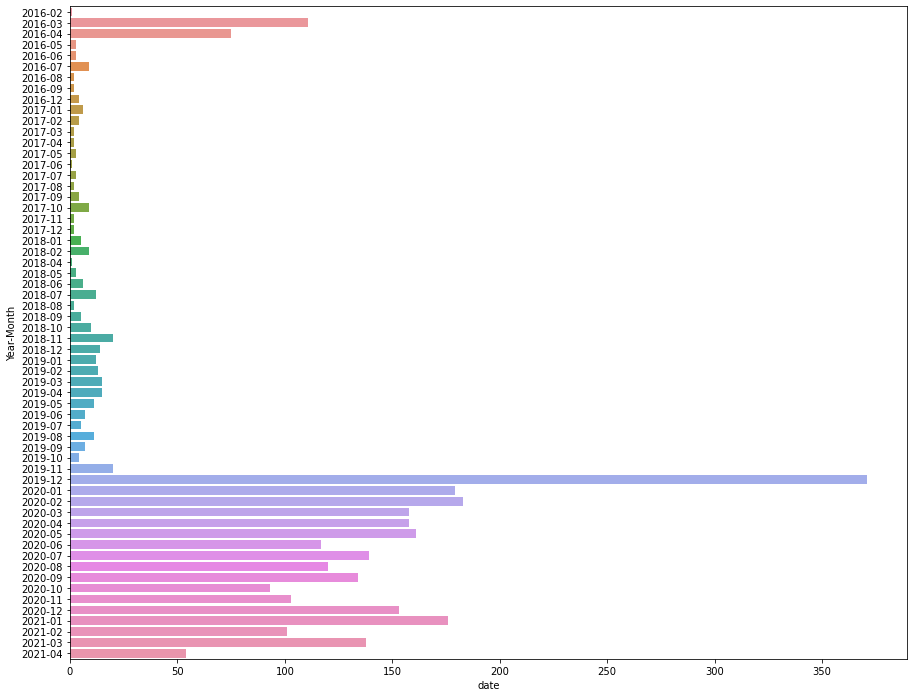

In [173]:
plt.rcParams["figure.figsize"] = (15, 12)
sns.barplot(x='date',y='Year-Month',data=애플날짜)
plt.show()

In [35]:
애플날짜

,Year-Month,date
0,2016-02,1
1,2016-03,111
2,2016-04,75
3,2016-05,3
4,2016-06,3
5,2016-07,9
6,2016-08,2
7,2016-09,2
8,2016-12,4
9,2017-01,6


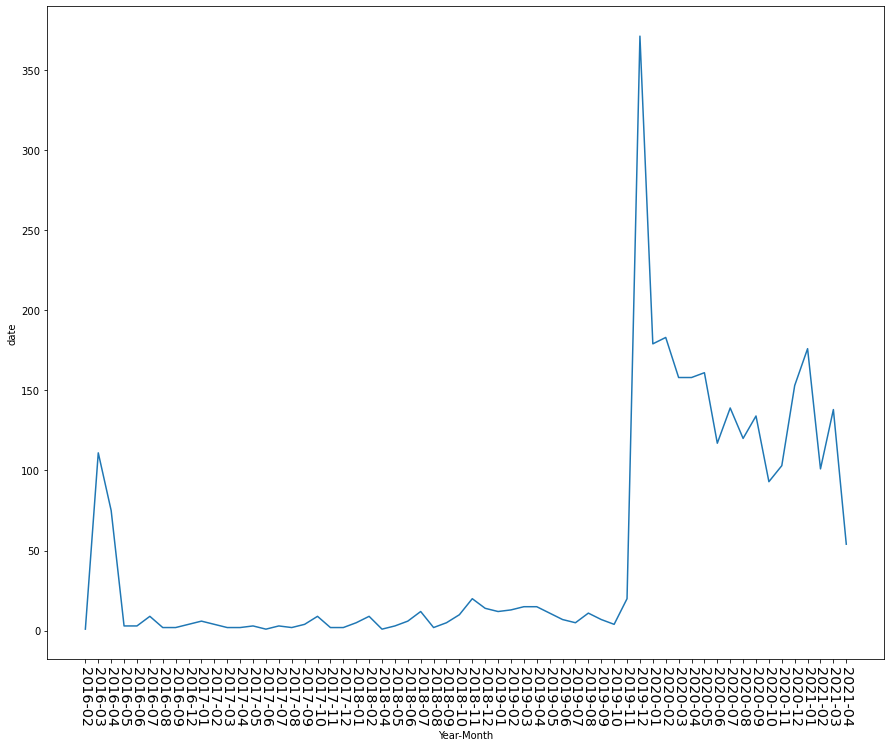

In [11]:
plt.rcParams["figure.figsize"] = (15, 12)
cc = sns.lineplot(x='Year-Month',y='date',data=애플날짜)
plt.xticks(
    rotation=270, 
    #horizontalalignment='right',
    #fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [37]:
구글날짜

,Year-Month,date
0,2016-03,80
1,2016-04,39
2,2016-05,3
3,2016-06,10
4,2016-07,4
5,2016-09,2
6,2016-10,2
7,2016-11,1
8,2016-12,3
9,2017-01,3


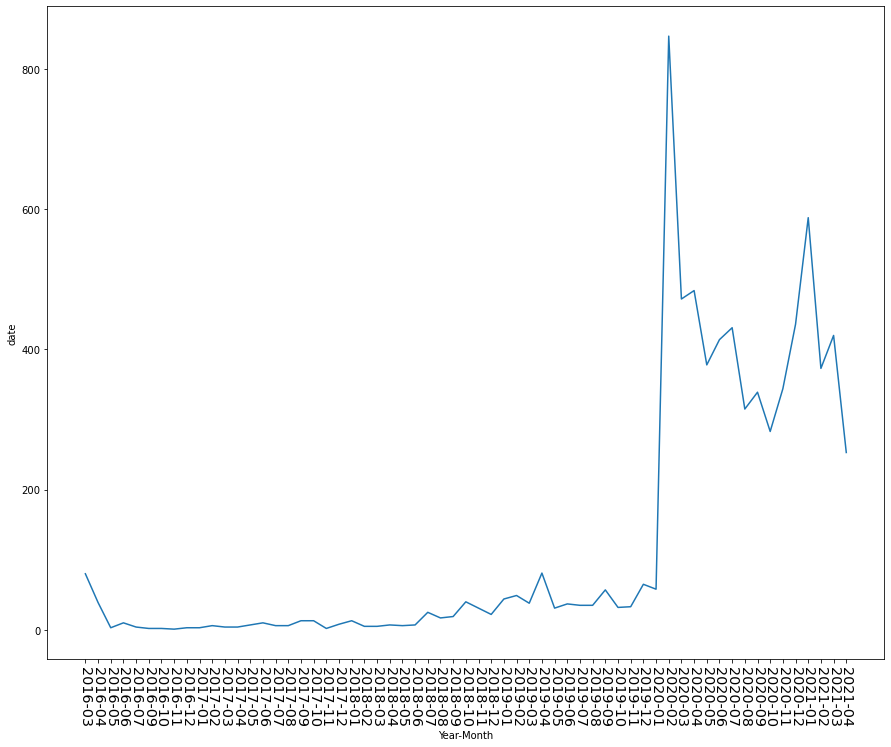

In [12]:
plt.rcParams["figure.figsize"] = (15, 12)
sns.lineplot(x='Year-Month',y='date',data=구글날짜)
plt.xticks(
    rotation=270, 
    #horizontalalignment='right',
    #fontweight='light',
    fontsize='x-large'  
)
plt.show()


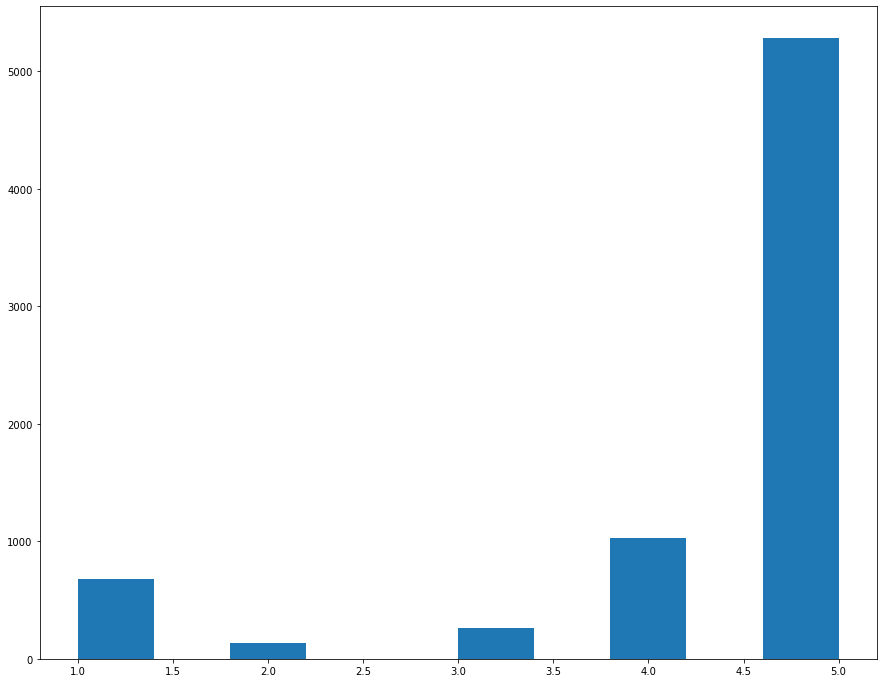

In [16]:
# df.ratings.hist()
plt.hist(df['ratings'])
plt.show()
#plt.savefig('./image2.png')


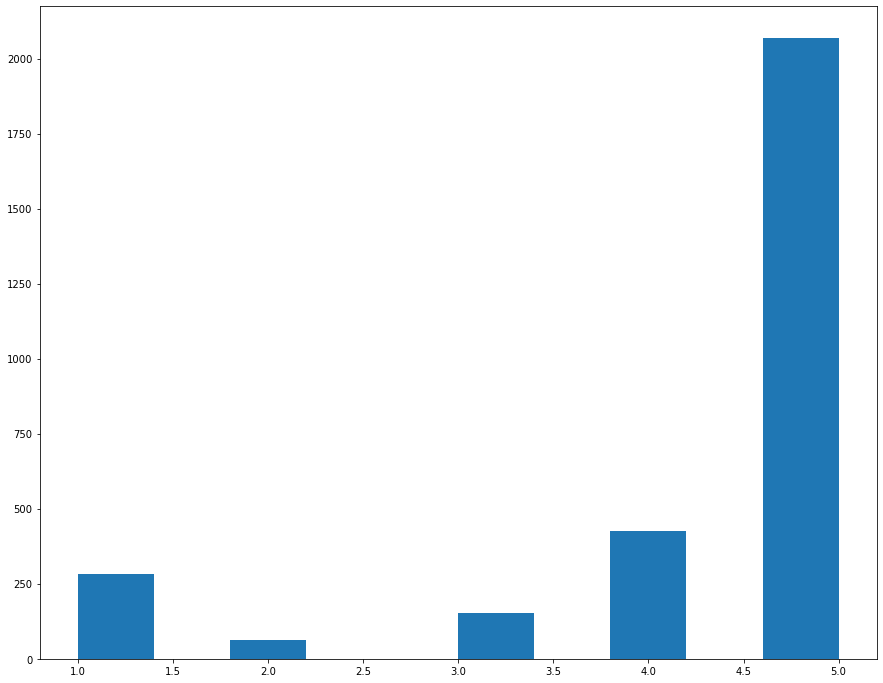

In [17]:
# df.ratings.hist()
plt.hist(df1['ratings'])
plt.show()
#plt.savefig('./image2.png')


In [13]:
df = df.dropna(axis = 0, how = 'any')
df1 = df1.dropna(axis = 0, how = 'any')
df = pd.concat([df, df1])
df = df.reset_index()
del df['index']

In [18]:
from soyspacing.countbase import CountSpace
def 띄어쓰기(text):
    verbose=False
    mc = 10  # min_count
    ft = 0.3 # force_abs_threshold
    nt =-0.3 # nonspace_threshold
    st = 0.3 # space_threshold


    sent_corrected, tags = model.correct(
    doc=text,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc)
    sent_corrected, tags = model.correct(text)
    result = sent_corrected
    return result
corpus_fname = './result/134963_norm.txt'
model = CountSpace()
model.train(corpus_fname)    

df['comment'] = df['comment'].apply(lambda x: 띄어쓰기(x))
df.head()
    
    

all tags length = 694236 --> 57795, (num_doc = 15602)

,date,comment,ratings,Year-Month
0,2021-04-16,너무편리해요,5,2021-04
1,2021-04-16,깔끔한 앱,5,2021-04
2,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,2021-04
3,2021-04-16,빠른배송감사합니다,5,2021-04
4,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,2021-04


In [19]:
from soyspacing.countbase import CountSpace
def 띄어쓰기(text):
    verbose=False
    mc = 10  # min_count
    ft = 0.3 # force_abs_threshold
    nt =-0.3 # nonspace_threshold
    st = 0.3 # space_threshold


    sent_corrected, tags = model.correct(
    doc=text,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc)
    sent_corrected, tags = model.correct(text)
    result = sent_corrected
    return result
corpus_fname = './result/134963_norm.txt'
model = CountSpace()
model.train(corpus_fname)    

df1['comment'] = df1['comment'].apply(lambda x: 띄어쓰기(x))
df1.head()
    
    

all tags length = 694236 --> 57795, (num_doc = 15602)

,date,comment,ratings,Year-Month
0,2020-02-16,전 아주 만족합니다. 우선 요즘은 빠르고 간편하고 다양한 음식을 접하려고 하잖아요....,5,2020-02
1,2020-07-02,먼저 아이스팩을 사용하지 않고 바로 버릴 수 있는 냉각을 사용하는 것과 종이 테이프...,5,2020-07
2,2020-05-26,매일 광고만 보다가 지방은 안되겠지..했어요.,5,2020-05
3,2018-05-13,친구가 추천해서 깔았는데 완전 좋네요 판매자랑 상품 별로 즐겨찾기? 관심상품 설정 ...,5,2018-05
4,2020-09-22,배송 누락이 너무 많이 발생합니다,2,2020-09


In [20]:
#맞춤법 검사기
for i in tqdm(range(len(df))): 
    try: 
        result = spell_checker.check(df['comment'][i])
        a= result[1]
        df['comment'][i] = a
    except: 
        pass



D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#맞춤법 검사기
for i in tqdm(range(len(df1))): 
    try: 
        result = spell_checker.check(df1['comment'][i])
        a= result[1]
        df1['comment'][i] = a
    except: 
        pass



D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
def text_cleaning(text):
    result = only_hangle(text)
    result = repeat_normalize(result, num_repeats=2) #반복적인 단어 응축(2번 이상인것들)
    result = emoticon_normalize(result,num_repeats=2) #반복적인 자음,모음 응축(2번 이상인것들)
    return result
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df1['ko_text'] = df1['comment'].apply(lambda x: text_cleaning(x))

df.head()

,date,comment,ratings,Year-Month,ko_text
0,2021-04-16,너무편리해요,5,2021-04,너무편리해요
1,2021-04-16,깔끔한 앱,5,2021-04,깔끔한 앱
2,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,2021-04,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 원만 딱 원 더 골르면 더있음 쿠폰쓸수...
3,2021-04-16,빠른배송감사합니다,5,2021-04,빠른배송감사합니다
4,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,2021-04,물품다양 고퀄리티 원료굿 배송굿 서비스굿


In [23]:
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.tokenizer import LTokenizer
word_extractor = WordExtractor(min_frequency=100,
   min_cohesion_forward=0.05,
   min_right_branching_entropy=0.0
)
word_extractor.train(df['ko_text'].values)
words = word_extractor.extract()
words

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)


training was done. used memory 0.755 Gb
all cohesion probabilities was computed. # words = 190
all branching entropies was computed # words = 8459
all accessor variety was computed # words = 8459


In [24]:
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.tokenizer import LTokenizer
word_extractor = WordExtractor(min_frequency=100,
   min_cohesion_forward=0.05,
   min_right_branching_entropy=0.0
)
word_extractor.train(df1['ko_text'].values)
words = word_extractor.extract()
words

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)


training was done. used memory 0.756 Gbry 0.756 Gb
all cohesion probabilities was computed. # words = 61
all branching entropies was computed # words = 4072
all accessor variety was computed # words = 4072


In [25]:
df['nouns'] = df['ko_text'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) # L과 R 분리하여 R은 삭제
df1['nouns'] = df1['ko_text'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) # L과 R 분리하여 R은 삭제

df

,date,comment,ratings,Year-Month,ko_text,nouns
0,2021-04-16,너무편리해요,5,2021-04,너무편리해요,[너무]
1,2021-04-16,깔끔한 앱,5,2021-04,깔끔한 앱,"[깔끔한, 앱]"
2,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,2021-04,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 원만 딱 원 더 골르면 더있음 쿠폰쓸수...,"[가격대별로, 볼수, 있는, 기능있음, 좋겠, 딱, 원만, 딱, 원, 더, 골르면,..."
3,2021-04-16,빠른배송감사합니다,5,2021-04,빠른배송감사합니다,[빠른배송감사합니다]
4,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,2021-04,물품다양 고퀄리티 원료굿 배송굿 서비스굿,"[물품다양, 고퀄리티, 원료굿, 배송, 서비스굿]"
...,...,...,...,...,...,...
7390,2016-03-02,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 쉽...,5,2016-03,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 쉽...,"[아이, 키우며, 좋은, 식자재에, 대한, 갈증이, 있는, 이렇게, 건강하고, 신선..."
7391,2016-03-02,"아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고,포장배송완벽함!내눈...",5,2016-03,아는동생소개로알게된마켓컬리 늦게안게아쉬울정ㅋㅋ품퀄리티완젼좋고 포장배송완벽함 내눈으로...,"[아는동생소개로알게된마켓컬리, 늦게안게아쉬울정ㅋㅋ품퀄리티완젼좋고, 포장, 내눈으로안..."
7392,2016-03-02,샛별배송 정말 훌륭합니다. 컬리라면 무조건 믿고 주문~ ^^*,5,2016-03,샛별배송 정말 훌륭합니다 컬리라면 무조건 믿고 주문,"[샛별배송, 정말, 훌륭합니다, 컬리, 무조건, 믿고, 주문]"
7393,2016-03-01,더이상 밤늦게 슈퍼를 헤매고 다니지않아도됨,5,2016-03,더이상 밤늦게 슈퍼를 헤매고 다니지않아도됨,"[더이상, 밤늦게, 슈퍼를, 헤매고, 다니지않아도됨]"


In [19]:
df.describe()

,ratings
count,10390.000000
mean,4.352936
std,1.237850
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
df = df.reset_index()
del df['index']

In [26]:
# 한국어 약식 불용어사전 예시 파일 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(x, remove_r=True)
    nouns = ','.join(nouns)
    nouns_tagger2 =  Okt()
    nouns = nouns_tagger2.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [27]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
for i in tqdm(range(len(df))):
    if not df['nouns'][i]:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']
print(df.shape)
df.head()


(5429, 6)


,date,comment,ratings,Year-Month,ko_text,nouns
0,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,2021-04,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 원만 딱 원 더 골르면 더있음 쿠폰쓸수...,"[가격, 대별, 기능, 원만, 쿠폰]"
1,2021-04-16,빠른배송감사합니다,5,2021-04,빠른배송감사합니다,[배송]
2,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,2021-04,물품다양 고퀄리티 원료굿 배송굿 서비스굿,"[다양, 퀄리티, 원료, 배송]"
3,2021-04-16,추 .ㅊ. ㅓ.ㅇ .ㅣ : ( 222444 ) 진짜 좋아요.~~^^ 잘 사용.하고 ...,5,2021-04,추 ㅊ ㅓ ㅇ ㅣ 진짜 좋아요 잘 사용 하고 있습니다 실은 전에 쿠팡 로켓프 레쉬를...,"[진짜, 사용, 쿠팡, 레쉬, 배달, 상품, 박스, 어서, 회원, 탈퇴, 새벽, 음..."
4,2021-04-16,너무 좋아요~~ 마켓컬리 컬리티가 굿!,5,2021-04,너무 좋아요 마켓컬리 컬리티가 굿,"[마켓, 컬리, 컬리]"


In [28]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,가격,1,1
1,대별,1,1
2,기능,1,1
3,원만,1,1
4,쿠폰,1,1


In [29]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head(20)

,satisfaction,count
words,,
가감,5.000000,1
가게,3.500000,6
가격,3.988679,265
가계,1.000000,1
가공,4.250000,4
가구,4.384615,13
가구라,5.000000,2
가까이,3.500000,2
가능,2.800000,15


In [ ]:
words_df = words_df.loc[words_df['count']>=3]
words_df.sort_values('satisfaction', ascending=False)

In [30]:
words_df.sort_values('count', ascending =False).head(20)

,satisfaction,count
words,,
배송,4.162804,1726
상품,4.142531,877
컬리,4.278020,687
사용,4.343257,571
제품,4.425569,571
마켓,4.240964,498
이용,4.279621,422
새벽,4.397260,365
포장,4.484419,353


In [31]:
df1['nouns'] = df1['ko_text'].apply(lambda x: get_nouns(x))
for i in tqdm(range(len(df1))):
    if not df1['nouns'][i]:
        df1.drop([i],inplace=True)
        
df1.reset_index(inplace=True)
del df1['index']
print(df1.shape)
df1.head()


(2594, 6)


,date,comment,ratings,Year-Month,ko_text,nouns
0,2020-02-16,전 아주 만족합니다. 우선 요즘은 빠르고 간편하고 다양한 음식을 접하려고 하잖아요....,5,2020-02,전 아주 만족합니다 우선 요즘은 빠르고 간편하고 다양한 음식을 접하려고 하잖아요 외...,"[요즘, 음식, 외식, 질리, 식구, 먹기, 비용, 식비, 대한, 마켓, 컬리, 이..."
1,2020-07-02,먼저 아이스팩을 사용하지 않고 바로 버릴 수 있는 냉각을 사용하는 것과 종이 테이프...,5,2020-07,먼저 아이스팩을 사용하지 않고 바로 버릴 수 있는 냉각을 사용하는 것과 종이 테이프...,"[먼저, 아이스팩, 사용, 냉각, 사용, 테이프, 사용]"
2,2020-05-26,매일 광고만 보다가 지방은 안되겠지..했어요.,5,2020-05,매일 광고만 보다가 지방은 안되겠지 했어요,"[매일, 광고, 지방]"
3,2018-05-13,친구가 추천해서 깔았는데 완전 좋네요 판매자랑 상품 별로 즐겨찾기? 관심상품 설정 ...,5,2018-05,친구가 추천해서 깔았는데 완전 좋네요 판매자랑 상품 별로 즐겨찾기 관심상품 설정 같...,"[추천, 완전, 판매, 자랑, 상품, 별로, 즐겨찾기, 관심, 상품, 수도]"
4,2020-09-22,배송 누락이 너무 많이 발생합니다,2,2020-09,배송 누락이 너무 많이 발생합니다,"[배송, 누락]"


In [32]:
all_words = []
satisfaction= []
for i in range(len(df1)):
    words = df1['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df1['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,요즘,5,1
1,음식,5,1
2,외식,5,1
3,질리,5,1
4,식구,5,1


In [33]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head(20)

,satisfaction,count
words,,
가게,5.000000,2
가격,4.511628,86
가공,3.500000,2
가구,4.666667,3
가까이,3.250000,4
가나,3.000000,2
가능,1.500000,6
가능도,5.000000,1
가득,5.000000,3


In [34]:
words_df.sort_values('count', ascending =False).head(20)

,satisfaction,count
words,,
배송,4.186567,670
컬리,4.514834,573
마켓,4.487585,443
상품,4.416918,331
제품,4.431452,248
이용,4.504902,204
구매,4.107143,196
포장,4.539394,165
사용,4.250000,152


In [ ]:
korean_stopwords_path = "./korean_stopwords222.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
def text_cleaning(text):
    result = only_hangle(text)
    result = repeat_normalize(result, num_repeats=2) #num_repeats 
    result = emoticon_normalize(result,num_repeats=2 )
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(result, remove_r=True)
    nouns = ','.join(nouns)
    nouns_tagger2 =  Okt()
    nouns = nouns_tagger2.nouns(nouns)
    nouns = [x for x in nouns if len(x) >1]
    nouns =[x for x in nouns if x not in stopwords]
    return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
bow_vect.shape

In [ ]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

In [ ]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect[0])

In [ ]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

In [ ]:
df.sample(10).head()

In [ ]:
df.ratings.hist()

In [ ]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [ ]:
df

In [ ]:
df.y.value_counts()

In [ ]:
y= df['y']
X_train,X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.3, random_state=40)

In [ ]:
print(X_test.shape)

# 로지스틱 회귀

In [ ]:
#불용어 배송 아래부터 바꾸면 됨 배송이란 단어를 남기고싶으면
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

In [ ]:
scores = cross_val_score(lr, tf_idf_vect, y, cv=10) # model, train, target, cross validation

print('cross-val-score \n{}'.format(scores))

print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

In [ ]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["True", "False"]
y_axis_labels = ["True", "False"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
# plt.rcParams['figure.figsize'] = [10,8]
# plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [ ]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [ ]:
for coef in coef_pos_index[:15]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

In [ ]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])